In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import chromedriver_binary
import csv
import re

家賃の平均値： 5.436041948579156
合計件数 1478


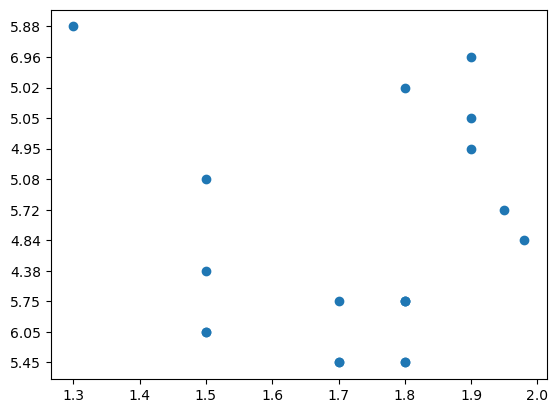

In [76]:
# 面積を坪のみにする(その後m2に修正)

df = pd.read_csv("ふれんず物件スクレイピング情報.csv")

print("家賃の平均値：",df["家賃"].mean())
# print("家賃の最大値：",df["家賃"].max())
# print("家賃の最小値：",df["家賃"].min())

print("合計件数",len(df))

area_list = []
price_list = []
for number in range(len(df)):
    
    # 値段をリストに追加
    if df.loc[number]["家賃"] < 2:
        price_list.append(df.loc[number]["家賃"])
        # 坪のみに変換
        area = re.sub(r"(.*)(?=/)", "",df.loc[number]["専有面積"])
        area = re.sub(r"[^\d.]", "",area)
        area_list.append(area)

# print("面積(m2)",area_list)
# print("家賃(万円)",price_list)

# 散布図を描画
plt.tight_layout()
plt.scatter(price_list,area_list)
